### Face Detection

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.load("/Users/nishantsoman/Documents/MITWPU/Computer Vision/exp 6/archive/olivetti_faces.npy")
target=np.load("/Users/nishantsoman/Documents/MITWPU/Computer Vision/exp 6/archive/olivetti_faces_target.npy")

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
print(data.shape)
print(data)


(400, 64, 64)
[[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
  [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
  [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
  ...
  [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
  [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
  [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]

 [[0.45454547 0.47107437 0.5123967  ... 0.19008264 0.18595041 0.18595041]
  [0.446281   0.48347107 0.5206612  ... 0.21487603 0.2107438  0.2107438 ]
  [0.49586776 0.5165289  0.53305787 ... 0.20247933 0.20661157 0.20661157]
  ...
  [0.77272725 0.78099173 0.7933884  ... 0.1446281  0.1446281  0.1446281 ]
  [0.77272725 0.7768595  0.7892562  ... 0.13636364 0.13636364 0.13636364]
  [0.7644628  0.7892562  0.78099173 ... 0.15289256 0.15289256 0.15289256]]

 [[0.3181818  0.40082645 0.49173555 ... 0.40082645 0.3553719  0.30991736]
  [0.309

In [9]:
import numpy as np
import cv2

# Load existing dataset
#existing_dataset = np.load('/archive/olivetti_faces.npy')

# Load and preprocess your new image using OpenCV
new_image_path = '/new/WhatsApp Image 2024-03-20 at 2.38.39 PM (1).jpeg'
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
new_image = cv2.resize(new_image, (64, 64))  # Resize to 64x64
flattened_image = new_image.flatten()

# Append the flattened image to the dataset
data = np.vstack([data, flattened_image])

# Save the updated dataset
np.save('/Users/nishantsoman/Documents/MITWPU/Computer Vision/exp 6/archive/olivetti_faces.npy', updated_dataset)


[ WARN:0@312.538] global loadsave.cpp:248 findDecoder imread_('/new/WhatsApp Image 2024-03-20 at 2.38.39 PM (1).jpeg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


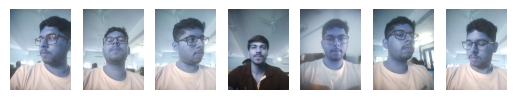

In [14]:
import cv2
import matplotlib.pyplot as plt
import os

# Path to the folder containing images
folder_path = '/Users/nishantsoman/Documents/MITWPU/Computer Vision/exp 6/new'

# List all files in the folder
image_files = os.listdir(folder_path)

# Iterate through each image file
for i in range(len(image_files)):
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_files[i])
    
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Display or process the image as needed
    # For example, you can display it using OpenCV's imshow functio
    plt.subplot(1,7,i+1);
    plt.axis("off")
    plt.imshow(image);


In [17]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

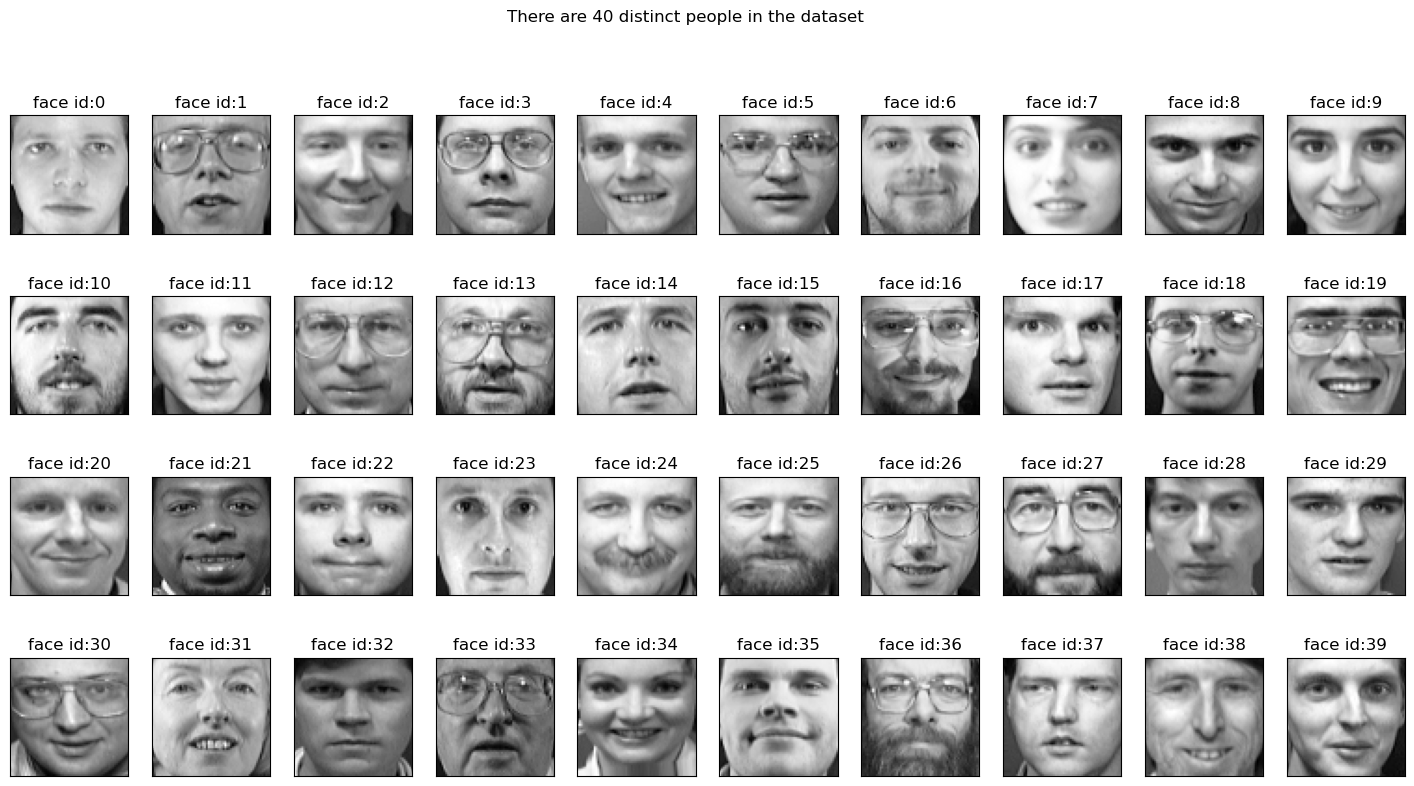

In [19]:
show_40_distinct_people(data, np.unique(target))

In [20]:
print(target)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [ ]:
if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier file')

In [ ]:
cap = cv2.VideoCapture(0)#'people_footage.mp4')

In [ ]:
scaling_factor = 0.5

In [ ]:
while True:
    x,frame = cap.read()
    frame = cv2.resize(frame,None,
                       fx=scaling_factor,fy=scaling_factor,
                       interpolation=cv2.INTER_AREA)
    print(frame)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    face_rects = face_cascade.detectMultiScale(gray,1.3,5)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
    cv2.imshow('Face detector', frame)
    
    c=cv2.waitKey(1)
    if c==27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()